In [3]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [7]:
import os

file_path = r'C:\Users\hp\Desktop\Machine Learning\Projects\5. Credit Card Fraud Detection Predictive Models\creditcard.csv'
if os.path.exists(file_path):
    print(f"The file {file_path} exists.")
else:
    print(f"The file {file_path} does not exist.")


The file C:\Users\hp\Desktop\Machine Learning\Projects\5. Credit Card Fraud Detection Predictive Models\creditcard.csv exists.


In [9]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [10]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
        f = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [13]:
import pandas as pd

nRowsRead = 1000  # Specify 'None' if you want to read the whole file
# creditcard.csv has 284807 rows in reality, but we are only loading/previewing the first 1000 rows
file_path = r'C:\Users\hp\Desktop\Machine Learning\Projects\5. Credit Card Fraud Detection Predictive Models\creditcard.csv'
df1 = pd.read_csv(file_path, delimiter=',', nrows=nRowsRead)
df1.dataframeName = 'creditcard.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')


There are 1000 rows and 31 columns


In [14]:
df1.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,...,-0.02,0.28,-0.11,0.07,0.13,-0.19,0.13,-0.02,149.62,0
1,0,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,...,-0.23,-0.64,0.10,-0.34,0.17,0.13,-0.01,0.01,2.69,0
2,1,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,...,0.25,0.77,0.91,-0.69,-0.33,-0.14,-0.06,-0.06,378.66,0
3,1,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,-1.39,...,-0.11,0.01,-0.19,-1.18,0.65,-0.22,0.06,0.06,123.50,0
4,2,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,0.82,...,-0.01,0.80,-0.14,0.14,-0.21,0.50,0.22,0.22,69.99,0


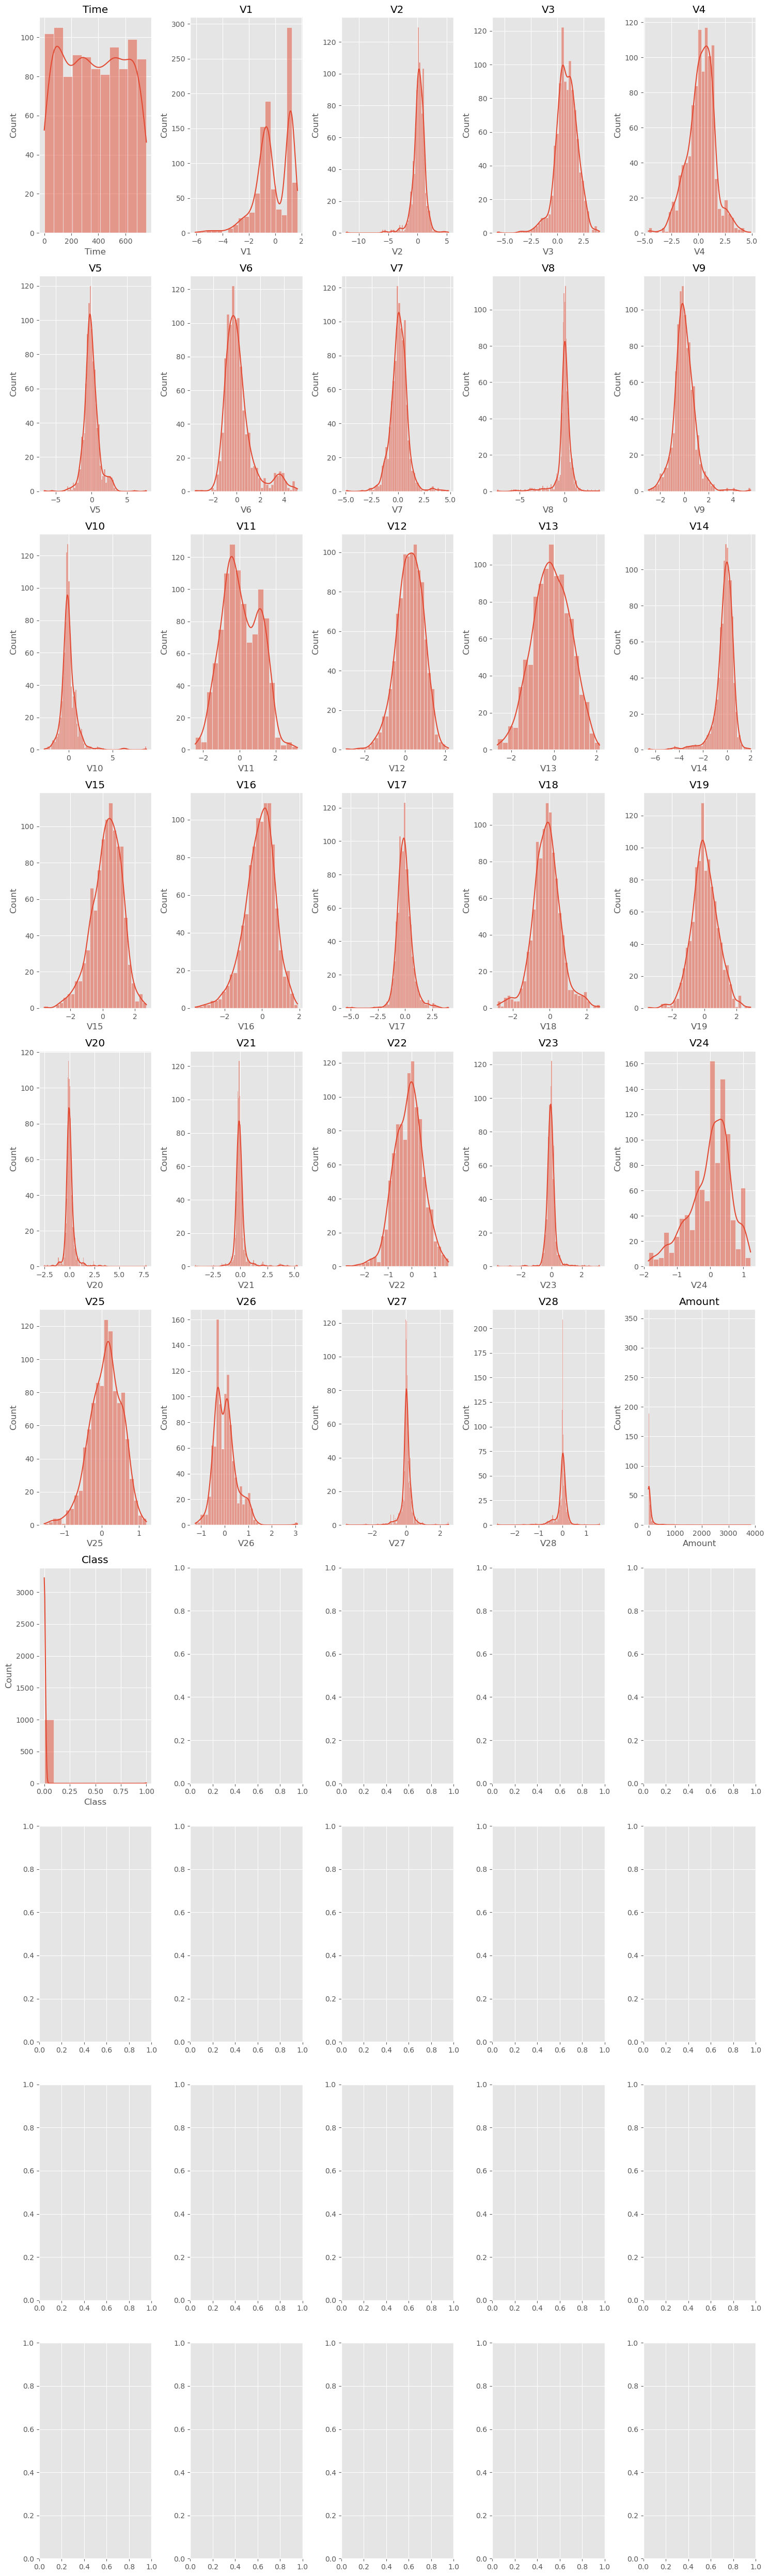

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_per_column_distribution(df, n_rows, n_cols):
    # Creating a grid of plots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    axes = axes.flatten()
    
    for i, col in enumerate(df.columns):
        if i < n_rows * n_cols:
            sns.histplot(df[col], ax=axes[i], kde=True)
            axes[i].set_title(col)
    
    plt.tight_layout()
    plt.show()

plot_per_column_distribution(df1, 10, 5)


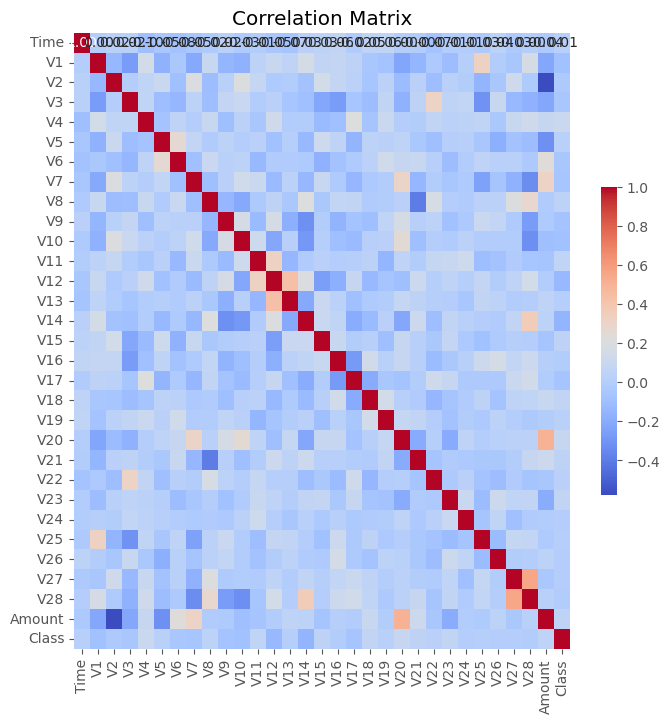

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_correlation_matrix(df, size):
    """
    Plots the correlation matrix for a given dataframe.
    
    Parameters:
    df (DataFrame): The dataframe containing the data.
    size (int): The size of the plot.
    """
    # Compute the correlation matrix
    corr = df.corr()
    
    # Create a heatmap
    plt.figure(figsize=(size, size))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'shrink': .5})
    plt.title('Correlation Matrix')
    plt.show()

# Example usage
plot_correlation_matrix(df1, 8)


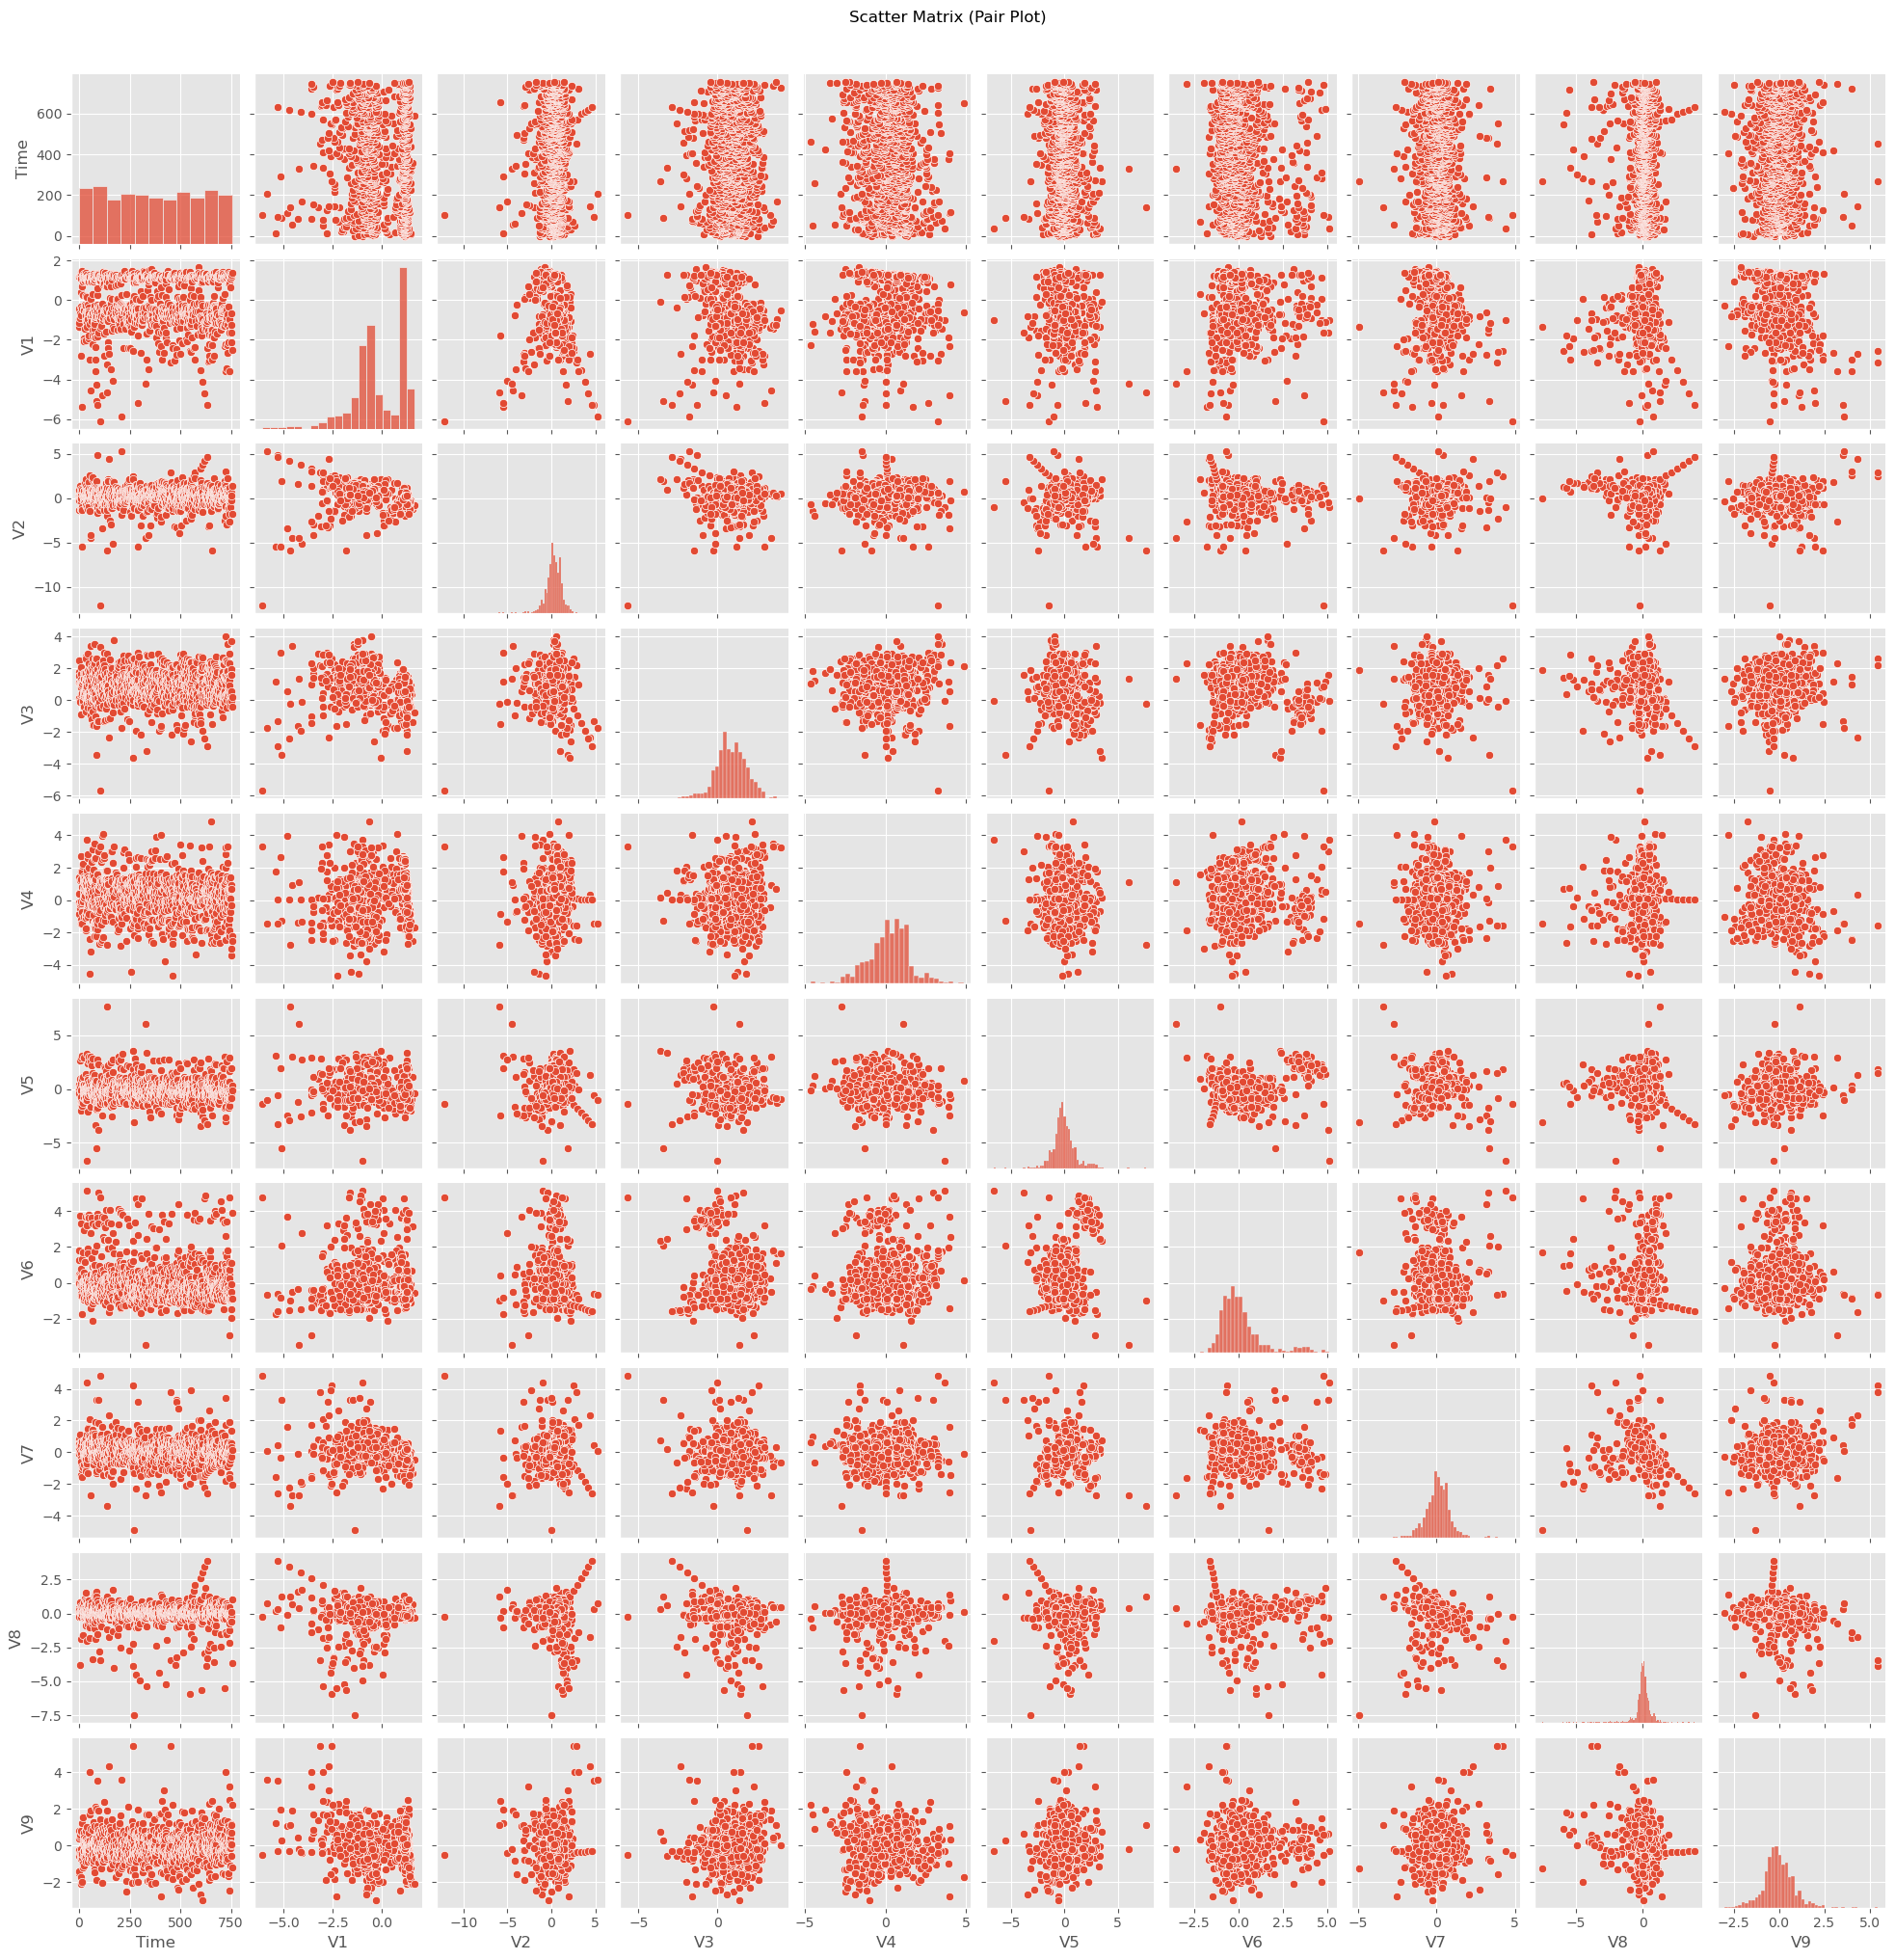

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_scatter_matrix(df, size, ncols):
    """
    Plots a scatter matrix for the first `ncols` columns of the dataframe.
    
    Parameters:
    df (DataFrame): The dataframe containing the data.
    size (int): The height and width of each subplot.
    ncols (int): The number of columns to include in the scatter matrix.
    """
    if ncols > len(df.columns):
        ncols = len(df.columns)  # Cap the number of columns to the dataframe's column count

    # Select the first `ncols` columns from the dataframe
    df_subset = df.iloc[:, :ncols]
    
    # Plot the pairplot
    sns.pairplot(df_subset, height=size / ncols)
    plt.suptitle('Scatter Matrix (Pair Plot)', y=1.02)
    plt.show()

# Example usage
plot_scatter_matrix(df1, 20, 10)
